<a href="https://www.kaggle.com/code/kelixirr/pizza-steak-classification-cnn?scriptVersionId=141850202" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-03 21:17:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 108.177.111.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   167MB/s    in 0.6s    

2023-09-03 21:17:29 (167 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
import pathlib 
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
# viewing an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_rand_img(target_dir, target_class):
    
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image Shape: {img.shape}")
          
    return img 

Image Shape: (512, 512, 3)


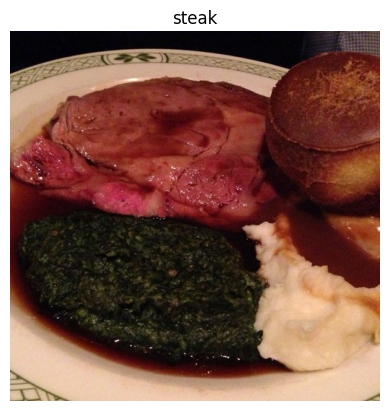

In [9]:
img = view_rand_img(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
img

array([[[  3,   2,  10],
        [  4,   3,  11],
        [  6,   5,  13],
        ...,
        [106,  88,  76],
        [ 90,  72,  58],
        [ 85,  68,  52]],

       [[  4,   3,  11],
        [  5,   4,  12],
        [  6,   5,  13],
        ...,
        [114,  96,  84],
        [100,  82,  68],
        [ 85,  68,  52]],

       [[  5,   4,  12],
        [  5,   4,  12],
        [  6,   5,  13],
        ...,
        [104,  86,  74],
        [ 97,  80,  64],
        [ 83,  66,  48]],

       ...,

       [[199, 173, 146],
        [207, 182, 152],
        [212, 187, 156],
        ...,
        [200, 181, 139],
        [202, 180, 141],
        [202, 180, 139]],

       [[188, 165, 134],
        [195, 172, 141],
        [199, 176, 144],
        ...,
        [187, 165, 126],
        [194, 172, 135],
        [199, 177, 138]],

       [[149, 126,  95],
        [155, 132, 101],
        [156, 136, 103],
        ...,
        [152, 130,  93],
        [157, 135,  98],
        [164, 142, 105]]

In [11]:
# normalize
img/255

array([[[0.01176471, 0.00784314, 0.03921569],
        [0.01568627, 0.01176471, 0.04313725],
        [0.02352941, 0.01960784, 0.05098039],
        ...,
        [0.41568627, 0.34509804, 0.29803922],
        [0.35294118, 0.28235294, 0.22745098],
        [0.33333333, 0.26666667, 0.20392157]],

       [[0.01568627, 0.01176471, 0.04313725],
        [0.01960784, 0.01568627, 0.04705882],
        [0.02352941, 0.01960784, 0.05098039],
        ...,
        [0.44705882, 0.37647059, 0.32941176],
        [0.39215686, 0.32156863, 0.26666667],
        [0.33333333, 0.26666667, 0.20392157]],

       [[0.01960784, 0.01568627, 0.04705882],
        [0.01960784, 0.01568627, 0.04705882],
        [0.02352941, 0.01960784, 0.05098039],
        ...,
        [0.40784314, 0.3372549 , 0.29019608],
        [0.38039216, 0.31372549, 0.25098039],
        [0.3254902 , 0.25882353, 0.18823529]],

       ...,

       [[0.78039216, 0.67843137, 0.57254902],
        [0.81176471, 0.71372549, 0.59607843],
        [0.83137255, 0

In [12]:
train_dir = "pizza_steak/train/" 
test_dir = "pizza_steak/test/"

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.) 
test_datagen = ImageDataGenerator( rescale = 1/ 255.) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224, 224),
                                            class_mode = "binary",
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
image, labels = train_data.next()
len(image), len(labels)

(32, 32)

In [16]:
image[:2], image[0].shape

(array([[[[0.5294118 , 0.3647059 , 0.16862746],
          [0.5529412 , 0.39607847, 0.19215688],
          [0.57254905, 0.427451  , 0.21176472],
          ...,
          [0.47450984, 0.3647059 , 0.21176472],
          [0.4666667 , 0.34509805, 0.23137257],
          [0.50980395, 0.3803922 , 0.3137255 ]],
 
         [[0.54509807, 0.38823533, 0.19607845],
          [0.5372549 , 0.3921569 , 0.18823531],
          [0.5254902 , 0.3803922 , 0.17254902],
          ...,
          [0.41960788, 0.30980393, 0.15294118],
          [0.49803925, 0.3803922 , 0.24705884],
          [0.4784314 , 0.3529412 , 0.2627451 ]],
 
         [[0.48235297, 0.32156864, 0.14117648],
          [0.5647059 , 0.4156863 , 0.22352943],
          [0.5882353 , 0.44705886, 0.24313727],
          ...,
          [0.48627454, 0.37647063, 0.22352943],
          [0.45098042, 0.33333334, 0.19215688],
          [0.4431373 , 0.32156864, 0.20784315]],
 
         ...,
 
         [[0.32156864, 0.14509805, 0.07058824],
          [0.29803

In [17]:
labels

array([0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

### Baseline Models

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
model_1 = Sequential([
    
    Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = "valid", activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
    
])

In [20]:
model_1.compile(loss = 'binary_crossentropy', 
               optimizer = "Adam",
               metrics = ["Accuracy"])

In [21]:
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 157ms/step - loss: 0.6557 - Accuracy: 0.5640 - val_loss: 0.5493 - val_Accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4991 - Accuracy: 0.7607 - val_loss: 0.5000 - val_Accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.2689 - Accuracy: 0.9093 - val_loss: 0.4216 - val_Accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.1190 - Accuracy: 0.9633 - val_loss: 0.6152 - val_Accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.0251 - Accuracy: 0.9940 - val_loss: 0.7828 - val_Accuracy: 0.7500


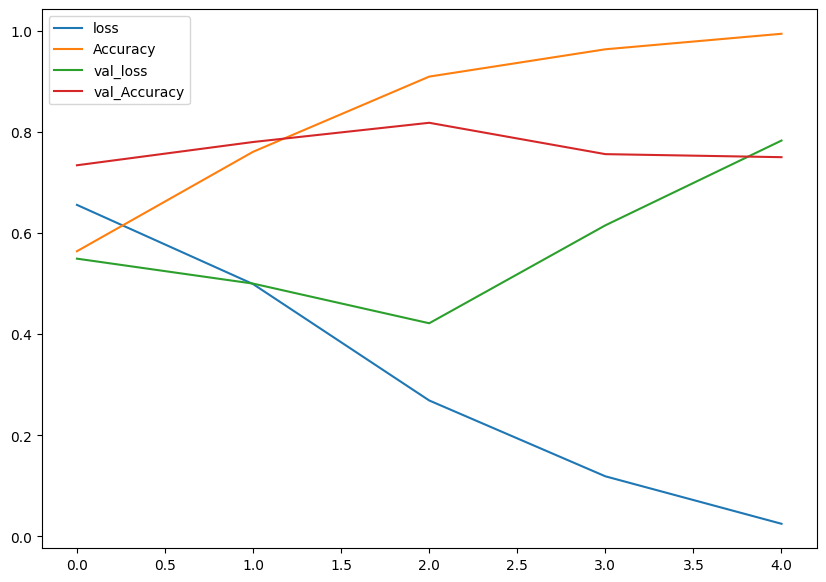

In [22]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [23]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
     Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['Accuracy']
    val_accuracy = history.history['val_Accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
     

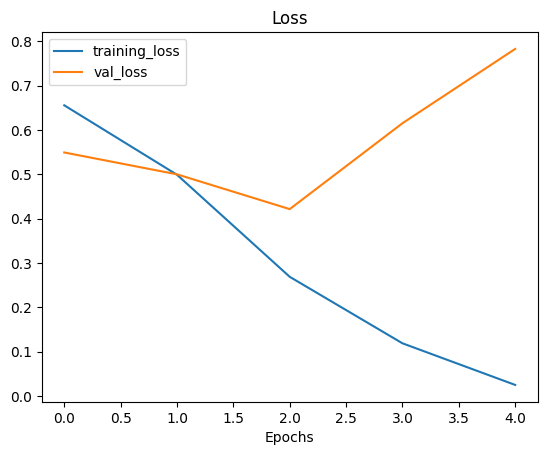

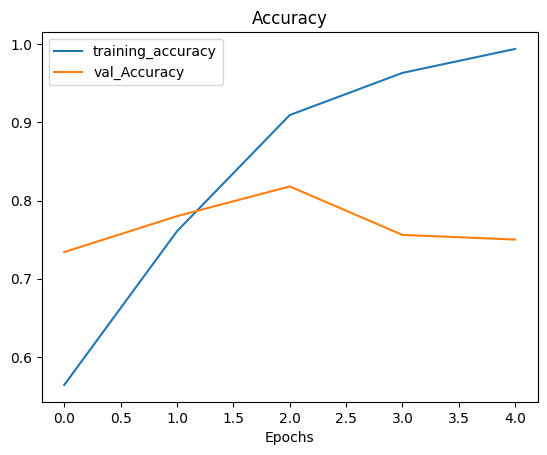

In [24]:
plot_loss_curves(history_1)

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_2 = Sequential([
    
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = "binary_crossentropy",
               optimizer = Adam(),
               metrics = ["Accuracy"])

In [27]:
history_2 = model_2.fit(train_data,
                       epochs = 5, 
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 118ms/step - loss: 0.5933 - Accuracy: 0.6893 - val_loss: 0.4702 - val_Accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4691 - Accuracy: 0.7960 - val_loss: 0.4006 - val_Accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4340 - Accuracy: 0.8100 - val_loss: 0.4042 - val_Accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3924 - Accuracy: 0.8333 - val_loss: 0.3511 - val_Accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3547 - Accuracy: 0.8540 - val_loss: 0.3609 - val_Accuracy: 0.8360


In [28]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

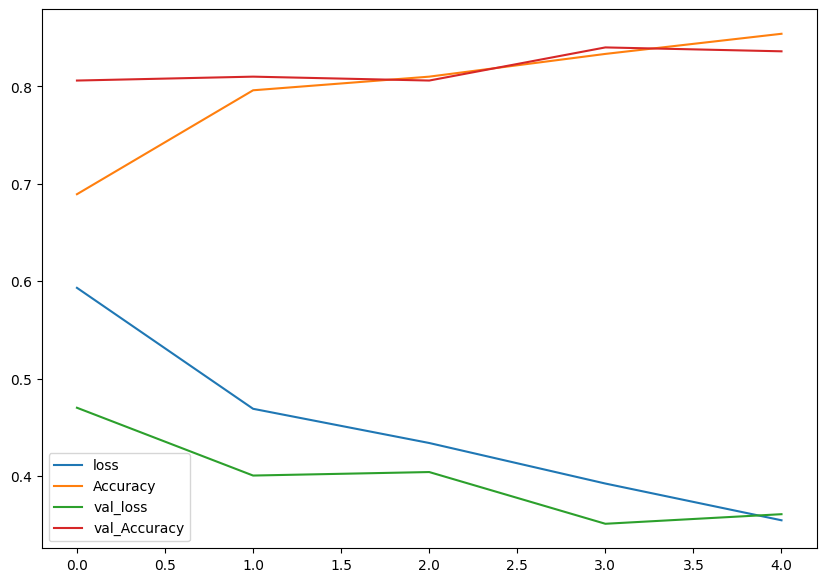

In [29]:
pd.DataFrame(history_2.history).plot(figsize = (10,7));

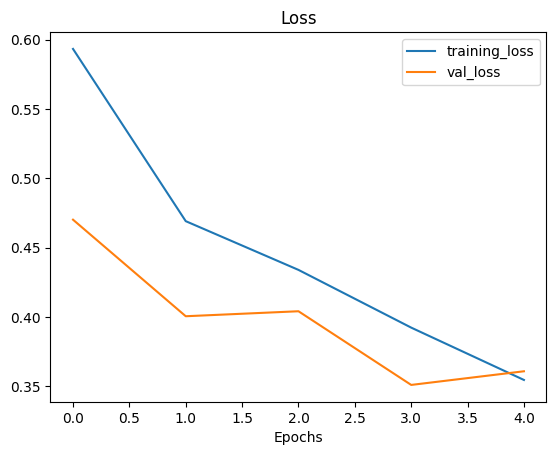

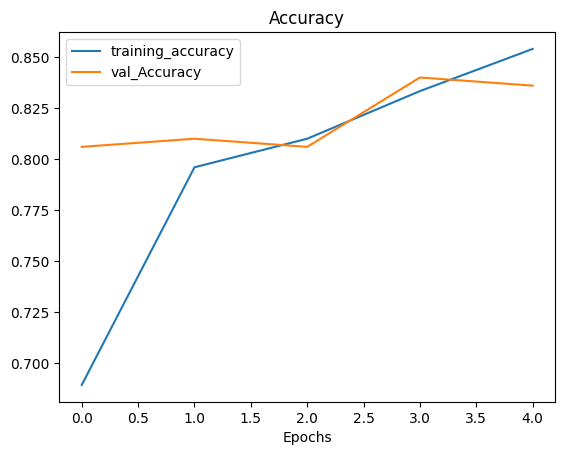

In [30]:
plot_loss_curves(history_2)

In [31]:
## Data Augementation 
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)


# training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

#test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224, 224),
                                                                  batch_size = 32,
                                                                  class_mode = "binary",
                                                                  shuffle = True)



train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

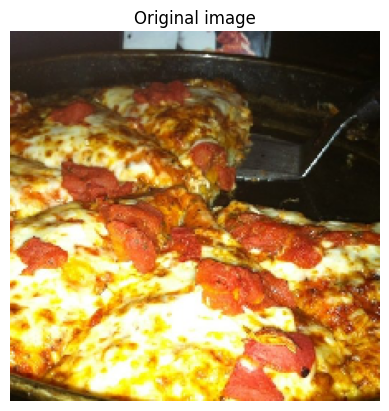

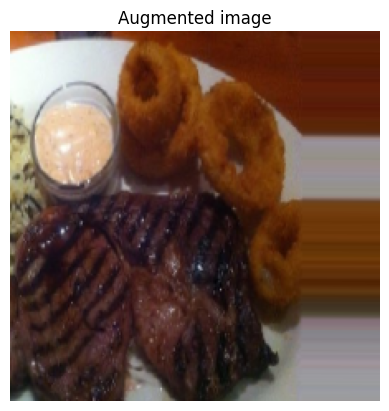

In [34]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [35]:
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['Accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 413ms/step - loss: 0.6726 - Accuracy: 0.5713 - val_loss: 0.5287 - val_Accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 20s 434ms/step - loss: 0.5505 - Accuracy: 0.7293 - val_loss: 0.4407 - val_Accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 19s 414ms/step - loss: 0.5217 - Accuracy: 0.7613 - val_loss: 0.4507 - val_Accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 20s 430ms/step - loss: 0.5370 - Accuracy: 0.7380 - val_loss: 0.3977 - val_Accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 35s 736ms/step - loss: 0.4886 - Accuracy: 0.7893 - val_loss: 0.3858 - val_Accuracy: 0.8560


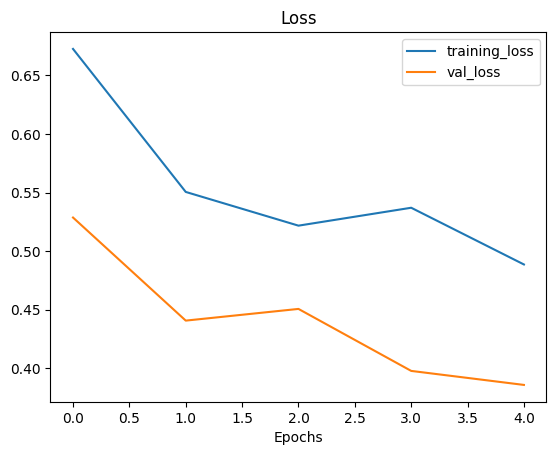

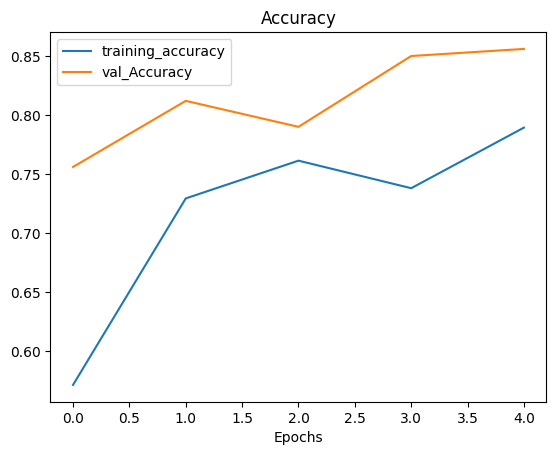

In [36]:
plot_loss_curves(history_3)

In [37]:
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 439ms/step - loss: 0.6451 - Accuracy: 0.6320 - val_loss: 0.4915 - val_Accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5542 - Accuracy: 0.7240 - val_loss: 0.4428 - val_Accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 21s 443ms/step - loss: 0.5231 - Accuracy: 0.7600 - val_loss: 0.4100 - val_Accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 20s 428ms/step - loss: 0.5008 - Accuracy: 0.7560 - val_loss: 0.4159 - val_Accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 20s 428ms/step - loss: 0.4867 - Accuracy: 0.7720 - val_loss: 0.3869 - val_Accuracy: 0.8520


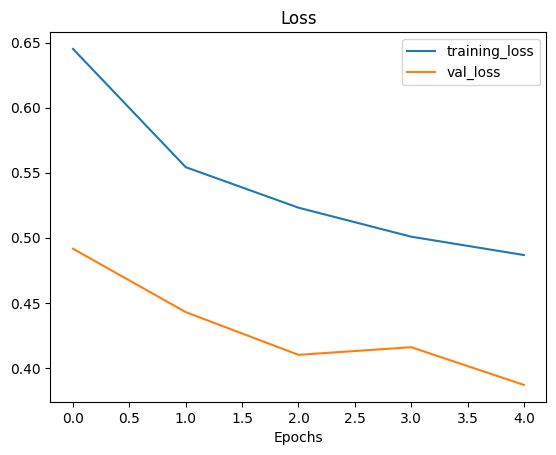

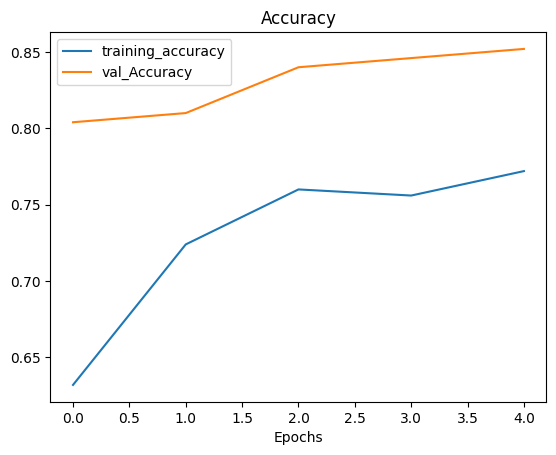

In [38]:
plot_loss_curves(history_4)

--2023-09-03 21:23:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-09-03 21:23:42 (27.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



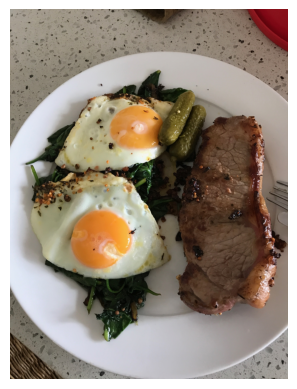

In [40]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [41]:
steak.shape

(4032, 3024, 3)

In [42]:
steak.size

36578304

In [46]:
# function to convert our test images to trained images type

def load_and_prep_images(filename, img_shape = 224):
    
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img, channels = 3)
    
    img = tf.image.resize(img, size = [img_shape, img_shape])
    
    img = img/255
    
    return img 

In [48]:
steak = load_and_prep_images("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [52]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [53]:
# let's change the shape of steak 
steak = tf.expand_dims(steak, axis=0)

In [54]:
steak.shape

TensorShape([1, 224, 224, 3])

In [55]:
model_4.predict(steak)

1/1 [==============================] - 0s 252ms/step


array([[0.83518076]], dtype=float32)

In [56]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [57]:
pred_class = class_names[int(tf.round(model_4.predict(steak)[0][0]))]

1/1 [==============================] - 0s 20ms/step


In [58]:
pred_class

'steak'

In [61]:
def pred_and_plot(model, filename, class_names):
  
    # Import the target image and preprocess it
    img = load_and_prep_images(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 21ms/step


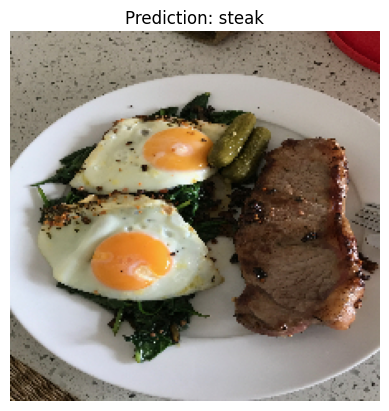

In [62]:
pred_and_plot(model_4, "03-steak.jpeg", class_names)

--2023-09-03 21:33:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-09-03 21:33:09 (37.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 22ms/step


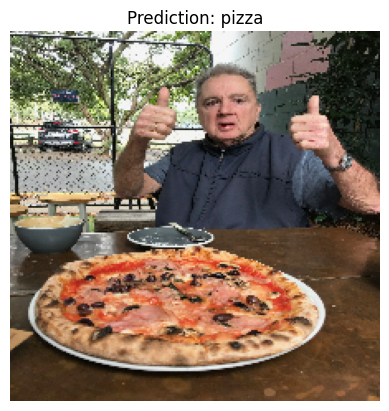

In [64]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_4, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 21ms/step


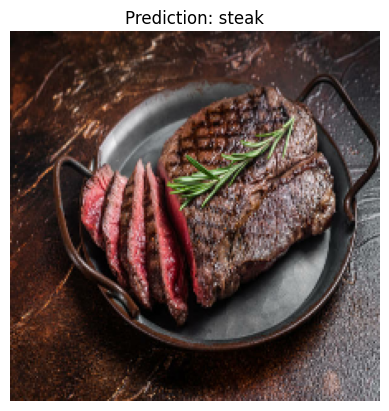

In [65]:
pred_and_plot(model_4, "/kaggle/input/images/istockphoto-1371751060-612x612.jpg", class_names)

1/1 [==============================] - 0s 19ms/step


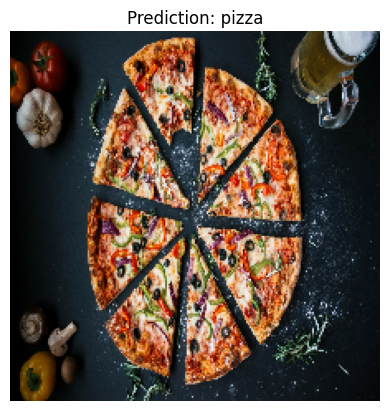

In [66]:
pred_and_plot(model_4, "/kaggle/input/images/pizza-3007395_1280.jpg", class_names)

Looks like our model is working fine!! 